In [7]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt 

In [9]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [10]:
 # Create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [11]:
# Reflect Database into a new model 
Base = automap_base()

# Reflect the tables 
Base.prepare(engine, reflect=True)

# View all the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [14]:
# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set. 
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [16]:
# Measurement
columns = inspector.get_columns('measurement')
for i in columns:
    print(i['name'], i['type'])

# Station
columns_2 = inspector.get_columns('station')
for i in columns:
    print(i['name'], i['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
# Find the most recent data in the data set
recent_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(f"The most recent data is: {recent_data}")



The most recent data is: ('2017-08-23',)


In [18]:
# Calculate the date one year from the last data in the data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print("Query Data: ", query_date)


Query Data:  2016-08-23


In [53]:
#Query to retrieve the last 12 months of precipitation data and plot the results.
Precipitation = session.query(Measurement.prcp, Measurement.date).\
    filter(Measurement.date > '2016-08-23').all()

Precipitation
prcp_dict = {}
for row in Precipitation:
    prcp_dict[row[1]]=row[0]
    
prcp_dict  



{'2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 

In [20]:
# Save the query results as a Pandas DataFrame 
precipitation_df = pd.DataFrame(Precipitation, columns = ['Precipitation', 'Dates'])

# Set the index to the date column                             
precipitation_df= precipitation_df.set_index("Dates")

# Sort the dataframe by data
precipitation_df = precipitation_df.sort_values(by=['Dates'])

# Display
precipitation_df.head()


,Precipitation
Dates,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


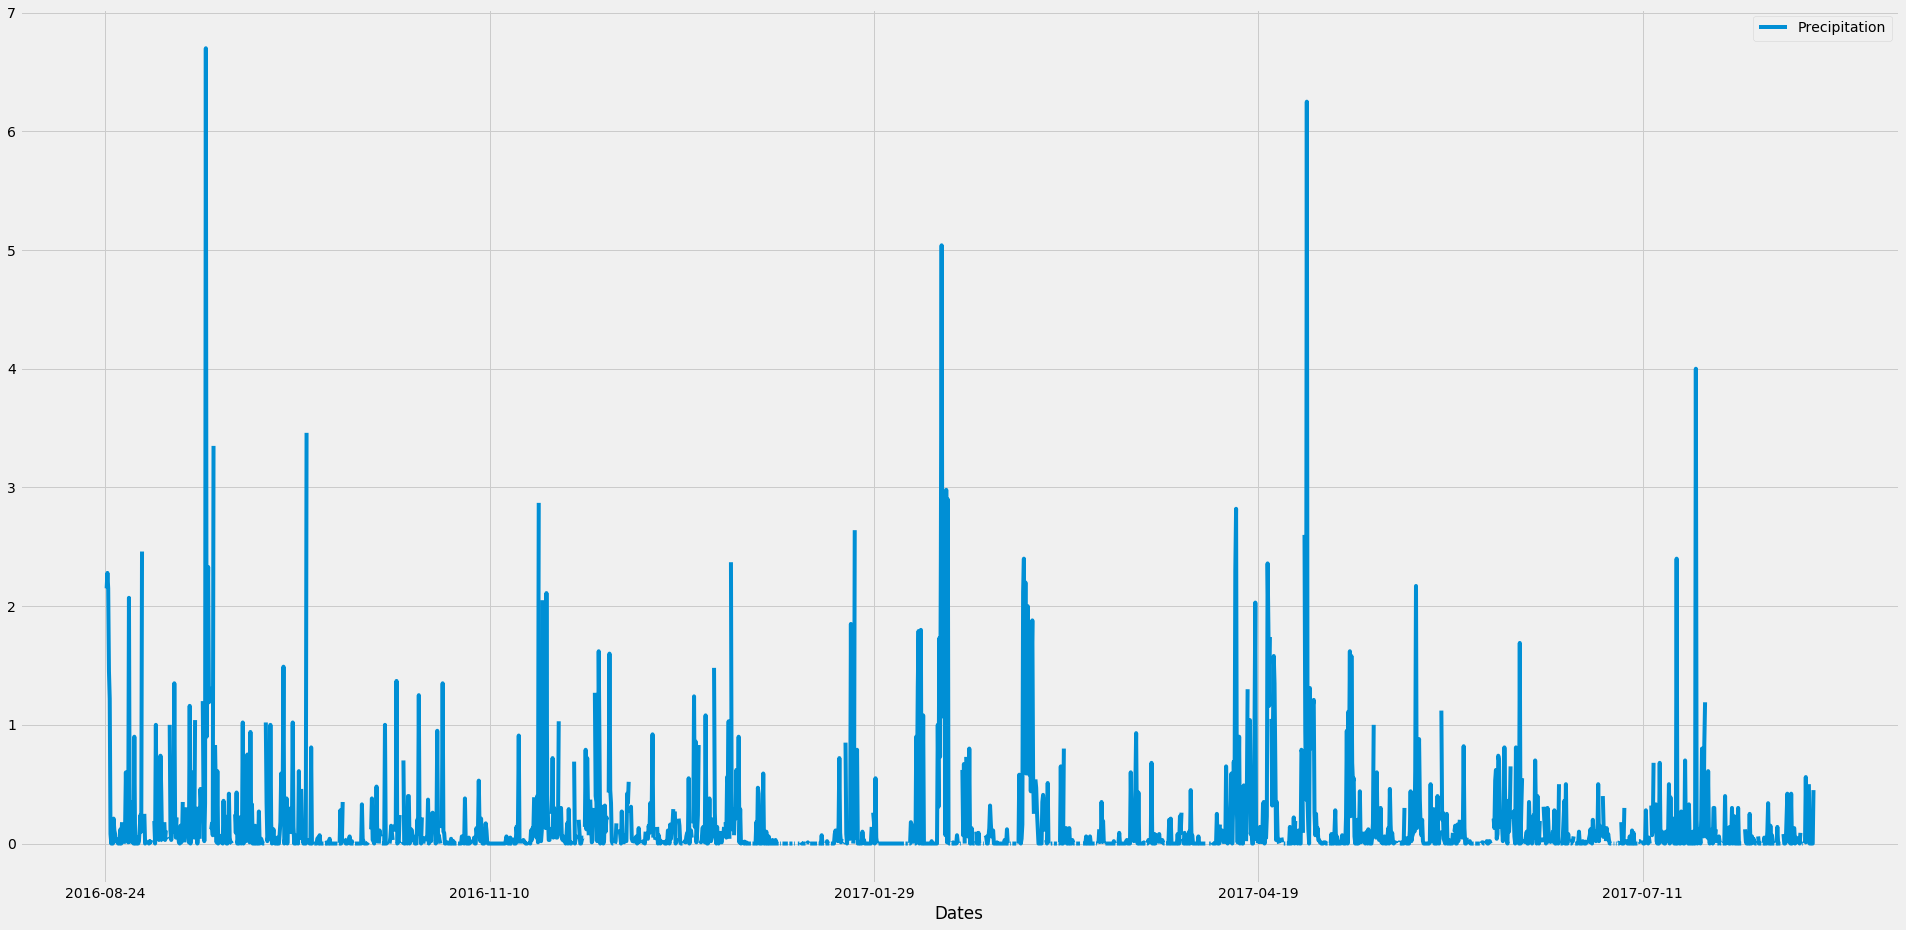

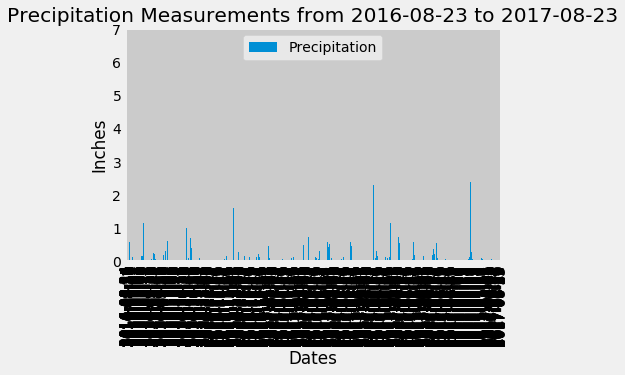

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize=(30,15))
precipitation_df.plot.bar()
plt.title("Precipitation Measurements from 2016-08-23 to 2017-08-23")
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [23]:
# Exploratory Station Analysis

In [58]:
 # Design a query to calculate the total number stations in the dataset
session.query(func.count(Measurement.station)).all()[0][0]


station_list: session.query(Measurement.station).all()

In [30]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_res = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

# Store variable
most_active = active_res[0][0]


most_active

'USC00519281'

In [59]:
# Using the most active station id from the previous query, 
# Calculate the lowest, highest, and average temperature.
    
session.query(func.min(Measurement.tobs), 
              func.max(Measurement.tobs), 
              func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active).all()
    
session.query(Measurement.tobs).all()

[(65.0,),
 (63.0,),
 (74.0,),
 (76.0,),
 (73.0,),
 (70.0,),
 (64.0,),
 (68.0,),
 (73.0,),
 (64.0,),
 (61.0,),
 (66.0,),
 (65.0,),
 (68.0,),
 (64.0,),
 (72.0,),
 (66.0,),
 (66.0,),
 (69.0,),
 (67.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (76.0,),
 (68.0,),
 (72.0,),
 (70.0,),
 (67.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (67.0,),
 (67.0,),
 (64.0,),
 (69.0,),
 (73.0,),
 (73.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (71.0,),
 (61.0,),
 (69.0,),
 (63.0,),
 (64.0,),
 (65.0,),
 (67.0,),
 (68.0,),
 (65.0,),
 (76.0,),
 (75.0,),
 (66.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (70.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (70.0,),
 (71.0,),
 (68.0,),
 (70.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (74.0,),
 (72.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (72.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (68.0,),
 (70.0,),
 (71.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (75.0,),


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffd3325e240>]],
      dtype=object)

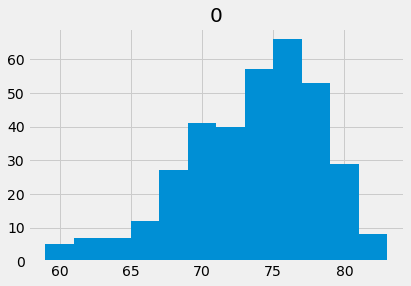

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram

temperature = session.query(Measurement.tobs).\
filter(Measurement.station == most_active).\
filter(Measurement.date >= query_date).all()

temp_df = pd.DataFrame(temperature).rename(index={0: "Station Histogram"})

# Histogram

temp_df.hist(bins=12)


In [48]:
# Close session
session.close()